# Lung Cancer Decision Tree

Using the Lung Cancer dataset from Kaggle, my goal is to create a Decision Tree classification model that can predict whether a patient has lung cancer based on the features present on the dataset.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_json('dataset.json')

In [77]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [79]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [80]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [81]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [82]:
symptoms = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
binary = lambda x: 1 if x == 1 else 0

In [83]:
for column in symptoms:
    df[column] = df[column].apply(binary)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,F,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,F,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,M,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,F,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0


## Finding Associations

In [119]:
cor_binary = df[symptoms + ['LUNG_CANCER']].corr()

<AxesSubplot:>

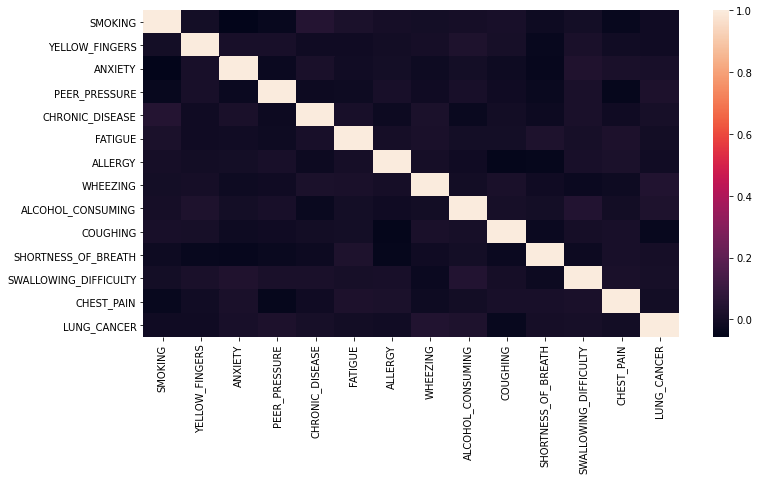

In [120]:
plt.figure(figsize=(12, 6))
sns.heatmap(cor_binary)

<AxesSubplot:>

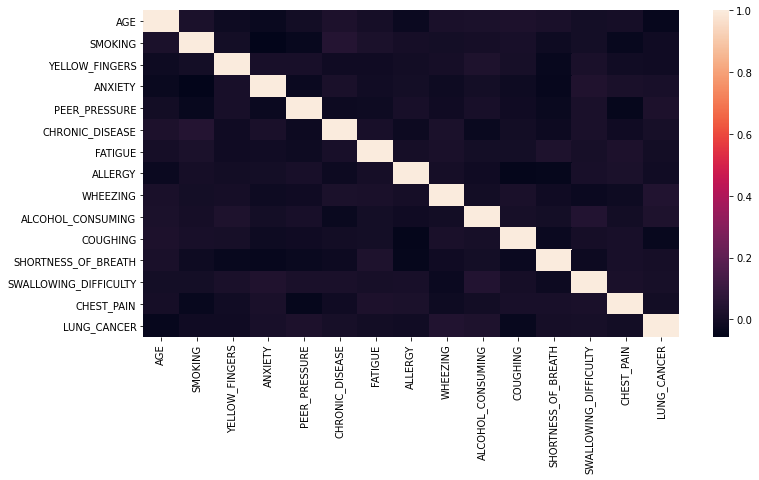

In [121]:
corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr)

In [89]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [87]:
df.groupby('SMOKING')['LUNG_CANCER'].sum()

SMOKING
0    756
1    762
Name: LUNG_CANCER, dtype: int64

In [91]:
df.groupby('YELLOW_FINGERS')['LUNG_CANCER'].sum()

YELLOW_FINGERS
0    790
1    728
Name: LUNG_CANCER, dtype: int64

In [93]:
df.groupby('SHORTNESS_OF_BREATH')['LUNG_CANCER'].sum()

SHORTNESS_OF_BREATH
0    739
1    779
Name: LUNG_CANCER, dtype: int64

In [110]:
from scipy.stats import chi2_contingency, ttest_ind

In [96]:
Xtab = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
Xtab

LUNG_CANCER,0,1
SMOKING,,
0,717,756
1,765,762


In [98]:
chi2, pval, doff, expected = chi2_contingency(Xtab)
print(chi2, pval)

0.5510111488430195 0.45790483338496013


In [99]:
chi2_ = []
pval_ = []

for col in symptoms:
    Xtab = pd.crosstab(df[col], df['LUNG_CANCER'])
    chi2, pval, doff, expected = chi2_contingency(Xtab)
    chi2_.append(chi2)
    pval_.append(pval)

In [103]:
assoc_dict = {'chi2': chi2_, 'pval': pval_}
associations = pd.DataFrame(assoc_dict, index=symptoms)
associations

,chi2,pval
SMOKING,0.551011,0.457905
YELLOW_FINGERS,0.456560,0.499236
ANXIETY,0.576132,0.447832
PEER_PRESSURE,1.724801,0.189076
CHRONIC_DISEASE,0.274629,0.600243
FATIGUE,0.007506,0.930959
ALLERGY,0.102350,0.749028
WHEEZING,4.318165,0.037708
ALCOHOL_CONSUMING,2.663874,0.102650
COUGHING,3.153243,0.075776


In [112]:
# The only significant association for LUNG CANCER is WHEEZING

associations[associations.pval < 0.05]

,chi2,pval
WHEEZING,4.318165,0.037708


In [113]:
# Testing for association with the feature GENDER. Didn't show significant association.

Xtab_gender = pd.crosstab(df['GENDER'], df['LUNG_CANCER'])
chi2, pval, doff, expected = chi2_contingency(Xtab_gender)
print(chi2, pval)

0.7158403950228966 0.3975117338177119


In [111]:
# Testing for association with the feature AGE. It seems to be just over the significance threshold of 0.05.

lung_cancer = df[df['LUNG_CANCER'] == 1]['AGE']
not_lung_cancer = df[df['LUNG_CANCER'] == 0]['AGE']

tstat, pval = ttest_ind(lung_cancer, not_lung_cancer)
pval

0.050482020977839506

## Model Fitting

Given that out of 13 binary variables I plan to use in the model, only one showed significant association with the target variable, I'm planning on fitting the model and feature engeneering based on the gini importance.

In [123]:
# GENDER feature transformation (1 for 'F', 0 for 'M')

binary_gender = lambda x: 1 if x == 'F' else 0

df['GENDER'] = df['GENDER'].apply(binary_gender)

In [124]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_train_pred = dtree.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_train = pd.Series(scores_dict)
scores_train

accuracy     0.999583
recall       0.999180
precision    1.000000
f1           0.999590
dtype: float64

In [129]:
# The model shows to have a lot of variance

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_test = pd.Series(scores_dict)
scores_test

accuracy     0.505000
recall       0.496644
precision    0.501695
f1           0.499157
dtype: float64

In [136]:
# Analizing feature importances. Interestingly enough, WHEEZING has one of the lowest feature importances

importances = pd.Series(dtree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
importances

AGE                      0.308552
GENDER                   0.069230
SHORTNESS_OF_BREATH      0.063278
ALCOHOL_CONSUMING        0.062497
YELLOW_FINGERS           0.057841
SMOKING                  0.053907
PEER_PRESSURE            0.053583
SWALLOWING_DIFFICULTY    0.052032
CHRONIC_DISEASE          0.050301
ANXIETY                  0.050267
ALLERGY                  0.048873
FATIGUE                  0.044573
WHEEZING                 0.037326
CHEST_PAIN               0.027370
COUGHING                 0.020370
dtype: float64

In [140]:
X = df[importances[importances > 0.050301].index]
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
# Taking out the features ANXIETY, ALLERGY, FATIGUE, WHEEZING, CHEST_PAIN and COUGHING yeilds almost the same performance of the model

y_pred = dtree2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_test = pd.Series(scores_dict)
scores_test

accuracy     0.496667
recall       0.510067
precision    0.493506
f1           0.501650
dtype: float64

In [152]:
# Tuning the model's hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 4, 5, 6, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 3, 5, 8, 10], 'ccp_alpha': [0.0, 0.01, 0.1, 1.0]}

search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='f1_macro', cv=5)
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_macro')

In [154]:
print(search.best_params_, search.best_score_)

{'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.5071487161437453


In [156]:
dtree3 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=1, min_samples_split=2)
dtree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [158]:
# The results stay practically the same after the Grid Search

y_pred = dtree2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_test = pd.Series(scores_dict)
scores_test

accuracy     0.496667
recall       0.510067
precision    0.493506
f1           0.501650
dtype: float64

# Conclusion

The features in the dataset don't seem to be appropriate features for predicting the target variable (LUNG_CANCER). Most of the features have weak associations to the target variable and, when grouped by any of the binary variables, the count of patients with lung cancer seems to be almost 50/50. Therefore, even after feature selection and parameter tuning, the model still has a poor performance.